# Vertical Tracer Variance Paper

In [58]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import argopy
import scipy.ndimage as filter
import scipy
import matplotlib
import gsw
from pathlib import Path
import cartopy.crs as ccrs
import pandas as pd
import os
import cmocean.cm as cmo
import matplotlib.colors as colors
import scipy.interpolate as interpolate
from flox.xarray import xarray_reduce
#from xgcm.autogenerate import generate_grid_ds
from xgcm import Grid

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import cmocean.cm as cmo



In [32]:
ds = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/high_res_1.nc')

In [74]:
print(ds)

<xarray.Dataset> Size: 95GB
Dimensions:            (N_PROF: 1488063, PRES_INTERPOLATED: 1001)
Coordinates:
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1996 1998 2000
    TIME               (N_PROF) datetime64[ns] 12MB ...
    LATITUDE           (N_PROF) float64 12MB -78.16 -78.15 ... 89.77 89.78
    LONGITUDE          (N_PROF) float64 12MB -174.6 -161.6 ... -99.35 139.1
  * N_PROF             (N_PROF) int64 12MB 2428701 1114461 ... 1502504 411205
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 12GB nan nan ... nan
    CYCLE_NUMBER       (N_PROF, PRES_INTERPOLATED) float64 12GB nan nan ... nan
    PLATFORM_NUMBER    (N_PROF, PRES_INTERPOLATED) float64 12GB nan nan ... nan
    PRES               (N_PROF, PRES_INTERPOLATED) float32 6GB nan nan ... nan
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 6GB nan nan ... nan
    SA                 (N_PROF, PRES_INTERPOLATED) float64 12GB nan nan ... nan
    SIG0               (N_PROF, PR

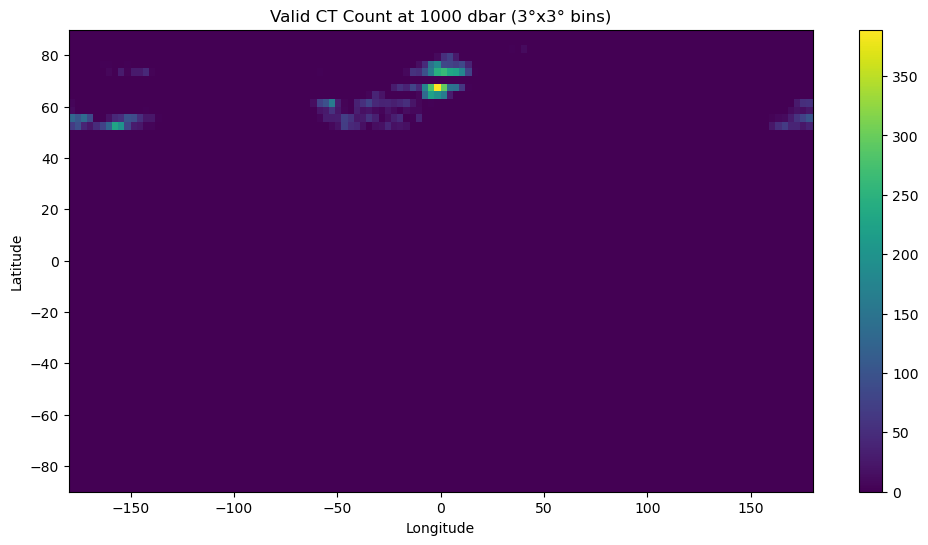

In [83]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def fast_ct_bin_count(ds, pres_level=1000, bin_size=3):
    # Step 1: Get index of desired pressure level
    pres_idx = np.where(ds.PRES_INTERPOLATED.values == pres_level)[0].item()

    # Step 2: Extract CT and mask
    ct = ds.CT.sel(PRES_INTERPOLATED=pres_level, method="nearest")
    valid = ~np.isnan(ct.values)
    lat = ds.LATITUDE.values[valid]
    lon = ds.LONGITUDE.values[valid]


    # Step 4: Define bins
    lat_bins = np.arange(-90, 91, bin_size)
    lon_bins = np.arange(-180, 181, bin_size)
    lat_idx = np.digitize(lat, lat_bins) - 1
    lon_idx = np.digitize(lon, lon_bins) - 1

    # Step 5: Count valid CTs per bin
    count = np.zeros((len(lat_bins)-1, len(lon_bins)-1), dtype=int)
    np.add.at(count, (lat_idx, lon_idx), 1)

    # Step 6: Wrap in xarray
    da = xr.DataArray(
        count,
        coords={
            "lat_bin": (lat_bins[:-1] + lat_bins[1:]) / 2,
            "lon_bin": (lon_bins[:-1] + lon_bins[1:]) / 2
        },
        dims=["lat_bin", "lon_bin"]
    )

    return da



binned_counts = fast_ct_bin_count(ds, pres_level=1000)

plt.figure(figsize=(12, 6))
binned_counts.plot.pcolormesh(cmap="viridis")
plt.title("Valid CT Count at 1000 dbar (3°x3° bins)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()